In [6]:
%matplotlib inline
import qiime2
from tempfile import mkdtemp
from qiime2.plugins import demux, deblur, quality_filter, \
                           metadata, feature_table, alignment, \
                           phylogeny, diversity, emperor, feature_classifier, \
                           taxa, composition

In [7]:
!pwd

/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis


# Import data

In [8]:
!mkdir qiime2-moving-pictures-tutorial
workdir='/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis/qiime2-moving-pictures-tutorial'
%cd $workdir

/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis/qiime2-moving-pictures-tutorial


In [9]:
!wget -O $workdir/"sample-metadata.tsv" "https://data.qiime2.org/2018.2/tutorials/moving-pictures/sample_metadata.tsv"

--2021-08-15 06:38:23--  https://data.qiime2.org/2018.2/tutorials/moving-pictures/sample_metadata.tsv
Resolving data.qiime2.org... 54.200.1.12
Connecting to data.qiime2.org|54.200.1.12|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://docs.google.com/spreadsheets/d/1LpGUOdXwCs6m4xR9DoB8yOl_22v1hczjZHyA41DhDXg/export?gid=0&format=tsv [following]
--2021-08-15 06:38:23--  https://docs.google.com/spreadsheets/d/1LpGUOdXwCs6m4xR9DoB8yOl_22v1hczjZHyA41DhDXg/export?gid=0&format=tsv
Resolving docs.google.com... 142.250.72.174, 2607:f8b0:4007:815::200e
Connecting to docs.google.com|142.250.72.174|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-00-6o-sheets.googleusercontent.com/export/70cmver1f290kjsnpar5ku2h9g/h9rgjkhmuvifmm1h8n8e33rq4o/1629034700000/103995680502445084602/*/1LpGUOdXwCs6m4xR9DoB8yOl_22v1hczjZHyA41DhDXg?gid=0&format=tsv [following]
--2021-08-15 06:38:23--  https://doc-00-6o-sheets.google

In [10]:
!mkdir $workdir/emp-single-end-sequences
!wget -O $workdir/"emp-single-end-sequences/barcodes.fastq.gz" "https://data.qiime2.org/2018.2/tutorials/moving-pictures/emp-single-end-sequences/barcodes.fastq.gz"
!wget -O $workdir/"emp-single-end-sequences/sequences.fastq.gz" "https://data.qiime2.org/2018.2/tutorials/moving-pictures/emp-single-end-sequences/sequences.fastq.gz"

--2021-08-15 06:39:36--  https://data.qiime2.org/2018.2/tutorials/moving-pictures/emp-single-end-sequences/barcodes.fastq.gz
Resolving data.qiime2.org... 54.200.1.12
Connecting to data.qiime2.org|54.200.1.12|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://s3-us-west-2.amazonaws.com/qiime2-data/2018.2/tutorials/moving-pictures/emp-single-end-sequences/barcodes.fastq.gz [following]
--2021-08-15 06:39:36--  https://s3-us-west-2.amazonaws.com/qiime2-data/2018.2/tutorials/moving-pictures/emp-single-end-sequences/barcodes.fastq.gz
Resolving s3-us-west-2.amazonaws.com... 52.92.129.16
Connecting to s3-us-west-2.amazonaws.com|52.92.129.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3783785 (3.6M) [application/x-gzip]
Saving to: ‘/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis/qiime2-moving-pictures-tutorial/emp-single-end-sequences/barcodes.fastq.gz’

/panfs/panfs1.ucsd. 100%[===================>]   3.61M  13.5MB/

In [11]:

single_end_sequences = qiime2.Artifact.import_data('EMPSingleEndSequences', workdir+'/emp-single-end-sequences')

In [12]:
sample_metadata = qiime2.Metadata.load(workdir+'/sample-metadata.tsv')

# Demultiplexing sequences

In [13]:
demux_sequences = demux.methods.emp_single(single_end_sequences,
                                           sample_metadata.get_column('BarcodeSequence'))

In [14]:
demux_summary = demux.visualizers.summarize(demux_sequences.per_sample_sequences)
demux_summary.visualization

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<visualization: Visualization uuid: ed49b0c0-3e2a-4fa5-bd7d-c354237b37b3>

<Figure size 432x288 with 0 Axes>

# Sequence quality control and feature table construction

In [15]:
demux_filter_stats = quality_filter.methods.q_score(demux_sequences.per_sample_sequences)

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/q2_quality_filter/_filter.py:89: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  phred_offset = yaml.load(metadata_view)['phred-offset']


In [16]:
deblur_sequences = deblur.methods.denoise_16S(demux_sequences.per_sample_sequences,
                                              trim_length=120,
                                              sample_stats=True)

In [17]:
filter_stats = metadata.visualizers.tabulate(demux_filter_stats.filter_stats.view(qiime2.Metadata))
filter_stats.visualization

<visualization: Visualization uuid: b9d3d048-78b3-4418-b471-c7c9ff58dca4>

In [18]:
deblur_stats = deblur.visualizers.visualize_stats(deblur_sequences.stats)
deblur_stats.visualization

<visualization: Visualization uuid: d353414f-6d9a-424c-9c37-83c885211894>

# FeatureTable and FeatureData summaries

/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jhc103/miniconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  war

<visualization: Visualization uuid: e9c78236-1cd1-4c90-8f92-f956f3439703>

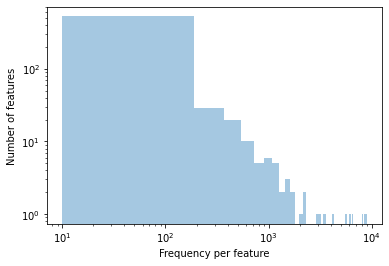

In [19]:
output_viz = feature_table.visualizers.summarize(deblur_sequences.table)
output_viz.visualization

In [20]:
deblur_feature_table_summary = feature_table.visualizers.tabulate_seqs(deblur_sequences.representative_sequences)
deblur_feature_table_summary.visualization

<visualization: Visualization uuid: 8a459715-193d-46e1-a94e-3c19204bf730>

# Generate a tree for phylogenetic diversity analyses

In [23]:
%ls

deblur.log  emp-single-end-sequences/  sample-metadata.tsv


In [24]:
mafft_alignment = alignment.methods.mafft(deblur_sequences.representative_sequences)

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-w8dolv2k/6eb094b8-6225-4c8d-94ee-01673573cd8c/data/dna-sequences.fasta



CalledProcessError: Command '['mafft', '--preservecase', '--inputorder', '--thread', '1', '/tmp/qiime2-archive-w8dolv2k/6eb094b8-6225-4c8d-94ee-01673573cd8c/data/dna-sequences.fasta']' returned non-zero exit status 1.